# __Chapter 2: Linear Time Series Analysis and Its Applications__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: January 25, 2019 <br>
<br>

## Introduction 

These notes are based on Chapter 2 of the book _Analysis of Financial Time Series 3rd Ed_ by Ruey Tsay. 

Understanding the simple time series models introduced here will go a long way to better appreciate the more sophisticated financial econometric models of later chapters.

<br>

Treating an asset return (e.g. log return $r_{t}$ of a stock) as a collection of random variables over time., we have a time series $\{r_{t}\}$. The Linear time series models of this chapter are a natural first attemp at modeling such dynamic behavior. 

<br>

The theories of linear time series discussed include:

- stationarity

- dynamic dependence

- autocorrelation function

- modeling

- forecasting


<br>

The econometric models introduced include: 

- (a) simple autoregressive (AR) models

- (b) simple moving-average (MA) models

- (c) mixed autoregressive moving-average (ARMA) models

- (d) unit-root nonstationarity

- (e) regression models with times series errors

- (f) fractionally differenced models for long-range dependence



## Section 2.1 Stationarity

The foundation of time series analysis is stationarity. A time series $\{r_{t}\}$ is said to be _strictly stationary_ if the joint distribution of
$(r_{t_{1} + t}, \ldots, r_{t_{k} + t})$ for all $t$, where $k$ is an arbitrary positive integer and $(t_{1}, \ldots, t_{k})$ is a collection of $k$ positive integers. 

<br>

Strict stationarity requires that the joint distribution of $(r_{t_{1} + t}, \ldots, r_{t_{k} + t})$ is invariant under time shift. This is a very strong requirement that is challenging to verify empirically. For this reason, we often employ a simpler form of stationarity. 

<br>

A time series is $\{r_{t}\}$ _weakly stationary_ if both the mean of $r_{t}$ and the covariance between $r_{t}$ and $r_{t-l}$ are time invariant, where $l$ is an arbitrary integer.

<br>

More specifically, $\{r_{t}\}$ is weakly stationary if:

- (a) $E(r_{t}) = \mu$, which is constant

- (b) $Cov(r_{t}, r_{t-l}) = \gamma_{l}$, which only depends on $l$

<br>

In practice, suppose that we have observed $T$ data points $\{r_{t} | 1, \ldots, T\}$. Weak stationarity implies that a time plot of the data would show that the $T$ values fluctuate with constant variation around a fixed level. In application, weak stationarity enables one to make inference concerning future observations (e.g. prediction).

<br>

Implicitly, in the condition of weak stationarity, we assume that the first two moments of $r_{t}$ are finite. From the definitions, if $r_{t}$ is strictly stationary and its first two moments are finite, then $r_{t}$ is also weakly stationary. The converse is not true in general. 

<br>

If the time series $r_{t}$ is normally distributed, then weak stationarity is equivalent to strict stationarity. 

<br>

We will be mainly concerned with weakly stationary time series.

<br>

The covariance $\gamma_{l} = Cov(r_{t}, r_{t-1})$ is called the lag-$l$ autocovariance of $r_{t}$. It has two important properties: 

- (a) $\gamma_{0} = Var(r_{t})$

- (b) $\gamma_{-l} = \gamma_{l}$

The second property holds because $Cov(r_{t}, r_{t-(-l)}) = Cov(r_{t-(-l)}, r_{t}) = Cov(r_{t+l}, r_{t}) = Cov(r_{t_{1}}, r_{t_{1} - l})$, where $t_{1} = t + l$. 

<br>

In the finance literature, is common to assume that an asset return series is weakly stationary. We can check this empirically given a sufficient number of historical returns observations. In particular, we can divide the historical returns into subsamples and check the consistency of the results obtained across subsamples. 

## Section 2.2 Correlation and Autocorrelation Function

Recall that the correlation between two random variables $X$ and $Y$ can be defined as:

$$
\rho_{x,y} = \frac{Cov(X,Y)}{\sqrt{Var(X) Var(Y)}} = \frac{E[(X - \mu_{x}) (Y - \mu_{y})]}{\sqrt{E[(X - \mu_{x})^{2}] E[(Y - \mu_{y})^{2}]}}
$$

<br>

This coefficient measures the strength between $X$ and $Y$, and can be shown that $-1 \le \rho_{x,y} \le +1$, and that $\rho_{x,y} = \rho_{y,x}$. The two random variables are uncorrelated if $\rho_{x,y} = 0$. In addition, if both $X$ and $Y$ are normally distributed random variables then the condition that $\rho_{x,y} = 0$ also indicates that they are independent. 

<br>

When the sample $\{(x_{t}, y_{t})\}_{t=1}^{T}$ then the population parameter can be estimated by its sample counterpart: 

$$
\hat{\rho}_{x,y} = \frac{\sum_{t=1}^{T} (x_{t} - \tilde{x}) (y_{t} - \tilde{y})}{\sqrt{\sum_{t=1}^{T} (x_{t} - \tilde{x})^{2}) \sum_{t=1}^{T} (y_{t} - \tilde{y})^{2}}}
$$

where $\tilde{x} = \frac{1}{T}\sum_{t=1}^{T} x_{t}$ and $\tilde{y} = \frac{1}{T}\sum_{t=1}^{T} y_{t}$ are the sample mean of $X$ and $Y$, respectively. 


#### Simulating Correlated Data

We can simulate correlated data with the following algorithm:

1. Draw $z_{1} \sim N(0,1)$
2. Draw $z_{2} \sim N(0,1)$
3. Set $\epsilon_{1} = z_{1}$
4. Set $\epsilon_{2} = \rho z_{1} + \sqrt{1 - \rho^{2}} z_{2}$, where $\rho$ is value of the correlation coefficient desired. 

<br>

We can do this in Python as follows:

In [7]:
import numpy as np

M = 100000
z1 = np.random.normal(size=M)
z2 = np.random.normal(size=M)
rho = 0.5
e1 = z1
e2 = rho * z1 + np.sqrt(1 - rho**2) * z2

np.corrcoef(e1,e2)

array([[1.        , 0.50055503],
       [0.50055503, 1.        ]])

In [5]:
np.corrcoef


<function numpy.lib.function_base.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)>

##### __Autocorrelation Function (ACF)__

Consider a weakly stationary return series $r_{t}$. When the linear dependence between $r_{t}$ and its past values $r_{t-i}$ is of interest, the concept of correlation is generalized to autocorrelation. 

<br>

The correlation coefficient between $r_{t}$ and $r_{t-l}$ is called the lag-$l$ _autocorrelation_ of $r_{t}$ and is commonly denoted by $\rho_{l}$.

<br>

Specifically, we define

$$
\rho_{l} = \frac{Cov(r_{t}, r_{t-l})}{\sqrt{Var(r_{t}) Var(r_{t-l})}} = \frac{Cov(r_{t}, r_{t-l})}{Var(r_{t})} = \frac{\gamma_{l}}{\gamma_{0}}
$$

<br>

For a given sample of returns $\{r_{t}\}_{t=1}^{T}$, let $\tilde{r}$ be the sample mean (i.e. $\tilde{r} = \frac{1}{T} \sum_{t=1}^{T} r_{t}$). Then the lag-$1$ sample autocorrelation of $r_{t}$ is

$$
\hat{\rho}_{1} = \frac{\sum_{t=2}^{T} (r_{t} - \tilde{r}) (r_{t-1} - \tilde{r})}{\sum_{t=1}^{T} (r_{t} - \tilde{r})^{2}} 
$$

<br>

Under general conditions, $\hat{\rho}_{1}$ is a consistent estimate of $\rho_{1}$. For example:

- If $\{r_{t}\}_{t=1}^{T}$ is an independent and identically distributed (iid) sequence 
- And $E(r_{t}^{2}) < \infty$
- Then $\hat{\rho}_{1}$ is asymptotically normal with mean $0$ and variance $1/T$

<br>

We can use this to test the hypothesis $H_{0}: \rho_{1} = 0$ against the alternative hypothesis $H_{a}: \rho_{1} \ne 0$. The test statistic is the usual $t$ ratio, which is $\sqrt{T} \hat{\rho}_{1}$ and follows asymptotically the standard normal distribution. The null hypothesis $H_{0}$ is rejected if the $t$ ratio is large in magnitude, or if the $p$-value of the $t$ ratio is small, say less than $0.05$. 

<br>

In general, the lag-$l$ sample autocorrelation of $r_{t}$ is defined as

$$
\hat{\rho}_{l} = \frac{\sum_{t=l+1}^{T} (r_{t} - \tilde{r}) (r_{t-l} - \tilde{r})}{\sum_{t=1}^{T} (r_{t} - \tilde{r})^{2}}, \quad\quad 0 \le l < T-1.
$$

<br>

If $\{r_{t}\}$ is an iid sequence satisfying $E(r_{t}^{2}) < \infty$, then $\hat{\rho}_{l}$ is asymptotically normal with mean zero and variance $1/T$ for any fixed positive integer $l$.

<br>

More generally, if $r_{t}$ is a weakly stationary time series satisfying $r_{t}= \mu + \sum_{i=0}^{q} \psi_{i} a_{t-i}$, where $\psi_{0} = 1$ and $\{a_{j}\}$ is a sequence of iid random variables with mean zero, then $\hat{\rho}_{l}$ is asymptotically normal with mean zero and variance $(1 + 2 \sum_{i=1}^{q} \hat{\rho}_{i}^{2})/T$ for $l > q$. This is known as Bartlett's formula.

##### __Testing Individual ACF__

For a given positive interger $l$, the previous result can be used to test $H_{0}: \rho_{l} = 0$ vs $H_{a}: \rho_{l} \ne 0$. The test statistic is

$$
t \mbox{-ratio} = \frac{\hat{\rho}_{l}}{\sqrt{(1 + 2 \sum_{i=1}^{l-1} \hat{\rho}_{i}^{2})/T}}
$$

<br>

If $\{r_{t}\}$ is a stationary Gaussian series satisfying $\rho_{j} = 0$ for $j > l$, the $t$ ratio is asymptotically distributed as a standard normal random variable. 

<br>

The decision rule is to reject $H_{0}$ if $|t\mbox{-ratio}| > z_{\alpha/2}$, where $z_{\alpha/2}$ is the $100(1 - \alpha/2)th$ percentile of the standard normal distribution. 

## Section 2.3 White Noise and Linear Time Series

#####  __White Noise__

A time series $r_{t}$ is called a white noise if $\{r_{t}\}$ is a sequence of independent and identically distributed random variables with finite mean and variance. If $r_{t}$ is normally distributed with mean zero and variance $\sigma^{2}$, the series called a Gaussian white noise.

<br>

For a white noise series, all of the ACFs are zero. In practice, as long as the ACFs are close to zero the process is treated as a white noise. 

<br>

##### __Linear Time Series__

A time series $r_{t}$ is called linear if it can be written as 

$$
r_{t} = \mu + \sum\limits_{i=0}^{\infty} \psi_{i} a_{t-i}
$$

where $\mu$ is the mean of $r_{t}$, $\psi_{0} = 1$, and $\{a_{i}\}$ is a sequence of iid random variables with mean zero and a well-defined distribution (i.e. $\{a_{i}\}$ is a white noise series).

<br>

It will be seen that $\{a_{i}\}$ denotes that new information at time $t$ of the time series and is often referred to as the _innovation_ or _shock_ at time $t$. 

<br>

If $r_{t}$ is weakly stationary, we can obtain its mean and variance easily by using the independence of $\{a_{t}\}$ as 

$$
E(r_{t}) = \mu, \quad \quad Var(r_{t}) = \sigma_{a}^{2} \sum\limits_{i=0}^{\infty} \psi_{i}^{2}
$$

where $\sigma_{a}^{2}$ is the variance of $a_{t}$. Because $Var(r_{t}) < \infty$, $\{\psi_{i}^{2}\}$ must be a convergent sequence, that is, 
$\psi_{i}^{2} \rightarrow 0$ as $i \rightarrow \infty$. Consequently, for a stationary time series, impact of the remote shock $a_{t-i}$ on the return $r_{t}$ vanishes as $i$ increases.

<br>

The lag-$l$ autocovariance of $r_{t}$ is

$$
\begin{aligned}
\gamma_{l} = Cov(r_{t}, r_{t-l}) &= E\left[\left( \sum\limits_{i=0}^{\infty} \psi_{i} a_{t-i}\right) \left(\sum\limits_{j=0}^{\infty} \psi_{j} a_{t-l-j}\right)\right] \\
                                 &= E\left(\sum\limits_{i,j=0}^{\infty} \psi_{i}\psi_{j} a_{t-i} a_{t-l-j}\right) \\
                                 &= \sum\limits_{j=0}^{\infty} \psi_{j+l} \psi_{j} E(a_{t-l-j}^{2}) = \sigma_{a}^{2} \sum\limits_{j=0}^{\infty} \psi_{j} \psi_{j+l} \\
\end{aligned}
$$

<br>

Consequently, the $\psi$ weights are related to the autocorrelations of $r_{t}$ as follows:

$$
\rho_{l} = \frac{\gamma_{l}}{\gamma_{0}} = \frac{\sum_{i=0}^{\infty} \psi_{i} \psi_{i+l}}{1 + \sum_{i=1}^{\infty} \psi_{i}^{2}}, \quad \quad l \ge 0,
$$

where $\psi_{0} = 1$. Linear time series models are econometric and statistical models used to describe the pattern of the $\psi$ weights of $r_{t}$. For a weakly stationary time series, $\psi_{i} \rightarrow 0$ as $i \rightarrow \infty$ and, hence, $\rho_{l}$ converges to zero as $l$ increases. 

For asset returns, this means that, as expected, the linear dependence of current return $r_{t}$ on the remote past return $r_{t-l}$ diminishes for large $l$.

## Section 2.4 Simple AR Models

A simple model that makes use of predictive power is

$$
r_{t} = \phi_{0} + \phi_{1} r_{t-1} + a_{t}
$$

where $\{a_{t}\}$ is assumed to be a white noise series with mean zero and variance $\sigma_{a}^{2}$. This model is in the same form as the well-known simple linear regression model in which $r_{t}$ is the dependent variable and $r_{t-1}$ is the explanatory variable. In the time series literature, this model is referred to as an autoregressive (AR) model of order 1 or simply an AR(1) model. This model is also used in stochastic volatility modeling when $r_{t}$ is replaced by its log volatility. 

<br>

The AR(1) model has several properties similar to those of the simple linear regression model. But there are also some significant differences between the two models, which we'll discuss later. For now, we note that an AR(1) model implies that, conditional on the past return $r_{t-1}$, we have

$$
E(r_{t}|r_{t-1}) = \phi_{0} + \phi_{1} r_{t-1}, \quad \quad Var(r_{t}|r_{t-1}) = Var(a_{t}) = \sigma_{a}^{2}
$$

<br>

That is, given the past return $r_{t-1}$, the current return is centered around $\phi_{0} + \phi_{1} r_{t-1}$ with standard deviation $\sigma_{a}$.

<br>

This is a Markov property such that conditional on $r_{t-1}$, the return $r_{t}$ is not correlated with $r_{t-i}$ for $i > 1$. 

<br>

There are situations in which $r_{t-1}$ alone cannot determine the conditional expectation of $r_{t}$ and a more flexible model must be sought. A straightforward generalization of the AR(1) model is the AR(p) model:

$$
r_{t} = \phi_{0} + \phi_{1} r_{t-1} + \cdots + \phi_{p} r_{t-p} + a_{t},
$$

where $p$ is a nonnegative integer and $\{a_{t}\}$ is defined as above. This model says that the past $p$ variables $r_{t-i} \quad (i = 1, \ldots, p)$ jointly determine the conditional expectation of $r_{t}$ given the past data. This model is in the same form as a multiple linear regression model with lagged values serving as the explanatory variables.

#### Properties of AR Models


To effectively use AR models, we must understand their basic properties. We will discuss properties of AR(1) and AR(2) models in detail and give the results for the general AR(p) model.


##### __AR(1) Model__

We begin with the sufficient and necessary condition for weak stationarity of the AR(1) mdoel. Assuming that the series is weakly stationary, we have

$$
E(r_{t}) = \mu, \quad \quad Var(r_{t}) = \gamma_{l}, \quad \quad \mbox{and} Cov(r_{t}, r_{t-j}) = \gamma_{j}$,  
$$

where $\mu$ and $\gamma_{0}$ are constant and $\gamma_{j}$ is a function of $j$, not $t$.

<br>

We can easily obtain the mean, variance, and autocorrelations of the series as follows. Taking the expectation and because $E(a_{t}) = 0$, we obtain

$$
E(r_{t}) = \phi_{0} + \phi_{1} E(r_{t-1})
$$

<br>

Under the stationarity condition, $E(r_{t}) = E(r_{t-1}) = \mu$ and hence

$$
\mu = \phi_{0} + \phi_{1} \mu \quad \quad \mbox{or} \quad \quad E(r_{t}) = \mu = \frac{\phi_{0}}{1 - \phi_{1}}
$$

<br>

This result has two implications for $r_{t}$. First, the mean of $r_{t}$ exists if $\phi_{1} \ne 1$. Second, the mean of $r_{t}$ is zero if and only if $\phi_{0} = 0$. Thus, for a stationary AR(1) process, the constant term $\phi_{0}$ is related to the mean of $r_{t}$ via 
$\phi_{0} = (1 - \phi_{1}) \mu$ and $\phi_{0} = 0$ implies that $E(r_{t}) = 0$.

<br>

Next, using $\phi_{0} = (1 - \phi_{1}) \mu$, the AR(1) model can be written as

$$
r_{t} - \mu = \phi_{1} (r_{t-1} - \mu) + a_{t}
$$

By repeated substitutions, the prior equation implies that

$$
\begin{aligned}
r_{t} - \mu &= a_{t} + \phi_{1} a_{t-1} + \phi_{1}^{2} a_{t-2} + \cdots \\
            &= \sum\limits_{i=0}^{\infty} \phi_{1}^{i} a_{t-i}
\end{aligned}
$$

<br>

Thus, $r_{t} - \mu$ is a linear function of $a_{t-i}$ for $i \ge 0$. Using this property and the independence of the series $\{a_{t}\}$, we obtain $E[(r_{t} - \mu)a_{t+1}] = 0$. By the stationarity assumption, we have $Cov(r_{t-1}, a_{t}) = E[(r_{t-1} - \mu)a_{t}] = 0$. Taking the square we obtain

$$
Var(r_{t}) = \phi_{1}^{2} Var(r_{t-1}) + \sigma_{a}^{2}
$$

where $\sigma_{a}^{2}$ is the variance of $a_{t}$, and we make use of the fact that the convariance between $r_{t-1}$ and $a_{t}$ is zero. Under the stationarity assumption, $Var(r_{t}) = Var(r_{t-1})$, so that

$$
Var(r_{t}) = \frac{\sigma_{a}^{2}}{1 - \phi_{1}^{2}}
$$

provided that $\phi_{1}^{2} < 1$. Weak stationarity implies that $-1 < \phi_{1} < 1$, that is, $|\phi_{1}| < 1$.Yet if $|\phi_{1}| < 1$ and by the independence of the $\{a_{t}\}$ series, we can show that the mean and variance of $r_{t}$ are finite and time invariant. In addition, the autocovariances of $r_{t}$ are finite. Therefore, the AR(1) model is weakly stationary. Therefore the necessary and sufficient condition for the AR(1) model to be weakly stationary is $|\phi_{1}| < 1$.

<br>

Using $\phi_{0} = (1 - \phi_{1})\mu$, one can rewrite a stationary AR(1) model as 

$$
r_{t} = (1 - \phi_{1}) \mu + \phi_{1} r_{t-1} + a_{t}
$$

<br>

This model is often used in the finance literature with $\phi_{1}$ measuring the persistence of the dynamic dependence of an AR(1) time series. 

<br>
<br>

##### __Autocorrelation Function of an AR(1) Model__

Multiplying $r_{t} - \mu = \phi_{1}(r_{t-1} - \mu) + a_{t}$ by $a_{t}$, using the independence between $r_{t-1}$ and $a_{t}$, and taking expectations, we obtain

$$
E[a_{t}(r_{t} - \mu)] = \phi_{1} E[a_{t} (r_{t-1} - \mu)] + E(a_{t}^{2}) = E(a_{t}^{2}) = \sigma_{a}^{2}
$$

where $\sigma_{a}^{2}$ is the variance of $a_{t}$. Multiplying by $r_{t} - \mu$, taking expectation, and using the prior result, we have


$$
\gamma_{l} = \begin{cases}
  \phi_{1} \gamma_{1} + \sigma_{a}^{2}, \quad \mbox{if} \quad l = 0 \\
  \phi_{1} \gamma_{l - 1},      \phantom{       }        \quad \quad \mbox{if} \quad l > 0
  \end{cases}  
$$

where we use $\gamma_{l} = \gamma_{-l}$. Therefore for a weakly stationary AR(1) model we have

$$
Var(r_{t}) = \gamma_{0} = \frac{\sigma^{2}}{1 - \phi_{1}^{2}} \quad \quad \mbox{and} \quad \quad \gamma_{l} = \phi_{1} \gamma_{l-1}, \quad \mbox{for} \quad l > 0
$$

<br>

From the latter equation, the ACF of $r_{t}$ satisfies 

$$
\rho_{l} = \phi_{1} \rho_{l-1}, \quad \mbox{for} \quad l > 0
$$

<br>

Because $\rho_{0} = 1$, we have $\rho_{l} = \phi_{1}^{l}$. This result says that ACF of a weakly stationary AR(1) series decays exponentially with rate $\phi_{1}$ and starting with value $\rho_{0} = 1$.

<br>
<br>

We can investigate this in Python with the following code. We will use a few Python modules:

* Numpy: http://www.numpy.org/

* Matplotlib: https://matplotlib.org/

* Pandas: https://pandas.pydata.org/

* Statsmodels: https://www.statsmodels.org/stable/index.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

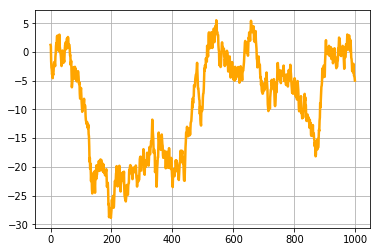

In [21]:
M = 1000
theta = 1.0  ## Try a few values: 0.5, 0.8, -0.8
y = np.zeros(M)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size=M)

for t in range(1,M):
    y[t] = theta * y[t-1] + a[t]
    
y = pd.Series(y)
y.plot(grid=True, color="orange", linewidth=2.5)

In [22]:
pd.Series.autocorr??

Signature: pd.Series.autocorr(self, lag=1)
Source:   
    def autocorr(self, lag=1):
        """
        Lag-N autocorrelation

        Parameters
        ----------
        lag : int, default 1
            Number of lags to apply before performing autocorrelation.

        Returns
        -------
        autocorr : float
        """
        return self.corr(self.shift(lag))
File:      ~/anaconda3/lib/python3.7/site-packages/pandas/core/series.py
Type:      function


In [23]:
g1 = y.autocorr(lag=1)
g1

0.9930524704351222

In [24]:
rho * g1

0.7944419763480979

In [25]:
# What's the difference here?
g2 = y.autocorr(lag=2)
g2

0.9865185897658617

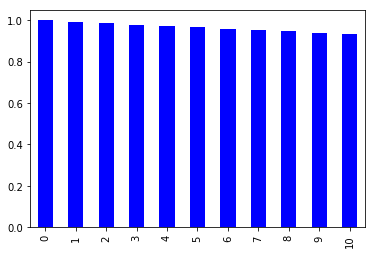

In [26]:
from statsmodels.tsa.stattools import acf, pacf

y_acf = acf(y, nlags=10)
pd.Series(y_acf).plot(kind="bar", grid=False, color="blue")

##### __AR(2) Model__

The AR(2) model assumes the form

$$
r_{t} = \phi_{0} + \phi_{1} r_{t-1} + \phi_{2} r_{t-2} + a_{t}
$$

<br>

Using the same technique as that of the AR(1) case, we obtain

$$
E(r_{t}) = \mu = \frac{\phi_{0}}{1 - \phi_{1} - \phi_{2}}
$$

provided that $\phi_{1} + \phi_{2} \ne 1$. Using $\phi_{0} = (1 - \phi_{1} - \phi_{2}) \mu$, we can rewrite the AR(2) model as

$$
(r_{t} - \mu) = \phi_{1}(r_{t-1} - \mu) + \phi_{2}(r_{t-2} - \mu) + a_{t}
$$

<br>

Multiplying the prior equation by $(r_{t-l} - \mu)$, we have

$$
(r_{t-l} - \mu)(r_{t} - \mu) = \phi_{1} (r_{t-l} - \mu) (r_{t-1} - \mu) 
                             + \phi_{2} (r_{t-l} - \mu) (r_{t-2} - \mu) + (r_{t-l} - \mu) a_{t}
$$


<br>

Taking expectation and using $E[(r_{t-l} - \mu)a_{t}] = 0$ for $l > 0$, we obtain

$$
\gamma_{l} = \phi_{1} \gamma_{l-1} + \phi_{2} \gamma_{l-2}, \quad \mbox{for} \quad l > 0
$$

This result is referred to as the _moment equation_ of a stationary AR(2) model. Dividing the above equation by $\gamma_{0}$, we have the property

$$
\rho_{l} = \phi_{1} \rho_{l-1} + \phi_{2} \rho_{t-2}, \quad \mbox{for} \quad l > 0
$$

for the ACF or $r_{t}$.In particular, the lag-$1$ ACF satisfies

$$
\rho_{1} = \phi_{1} \rho_{0} + \phi_{2} \rho_{-1} = \phi_{1} + \phi_{2} \rho_{1}
$$

Therefore, for a stationary AR(2) series $r_{t}$, we have $\rho_{0} = 1$,

$$
\begin{aligned}
\rho_{1} &= \frac{\phi_{1}}{1 - \phi_{2}} \\
\rho_{l} &= \phi_{1} \rho_{l-1} + \phi_{2} \rho_{l-2}, \quad l \ge 2
\end{aligned}
$$

This says that the ACF of a stationary AR(2) series satisifies the second-order difference
equation

$$
(1 - \phi_{1} B - \phi_{2} B^{2}) \rho_{l} = 0
$$

where $B$ is called the _back-shift_ operator such that $B\rho_{l} = \rho_{l-1}$.

___NB:___ Ender uses the $L$  instead of $B$ for the back-shift operator. Here $L$ stands for _lag_ operator. For instance, $Lr_{t} = r_{t-1}$ and $L\psi_{k} = \psi_{k-1}$.

Corresponding to the prior difference equation, there is a second-order polynomial equation:

$$
1 - \phi_{1}x - \phi_{2}x^{2} = 0
$$

Solutions of this equation are

$$
x = \frac{\phi_{1} \pm \sqrt{\phi_{1}^{2} + 4 \phi_{2}}}{-2\phi_{2}}
$$

<br>

In the time series literature, inverses of the two solutions are referred to as the _characterisitic roots_ of the AR(2) model. Denote the two characteristic roots by 
$\omega_{1}$ and $\omega_{2}$. If both $\omega_{i}$ are real valued, then the second-order
difference equation of the model can be factored as $(1 - \omega_{1} B)(1 - \omega_{2}B)$.

<br>

The ACF of $r_{t}$ is then a mixture of two exponential decays, $\phi_{1}^{2} + 4\phi_{2} < 0$, then $\omega_{1}$ and $\omega_{2}$ are complex numbers.

<br>

In business and economics applications, complex characteristics roots are important. They give rise to the behavior of business cycles. It is then common for economic time series models to have comlex-valued characteristic roots. 


#### Identifying AR Models in Practice

#### Goodness of Fit

#### Forecasting

## Section 2.5 Simple MA Models

#### Properties of MA Models

#### Identifying MA Order

#### Estimation

#### Forecasting Using MA Models

## Section 2.6 Simple ARMA Models

#### Properties of ARMA(1,1) Models

#### General ARMA Models

#### Identifying ARMA Models

#### Forecasting Using an ARMA Model

#### Three Model Representations for an ARMA Model

## Section 2.7 Unit-Root Nonstationarity

#### Random Walk

#### Random Walk with Drift

#### Trend-Stationary Time Series

#### General Unit-Root Nonstationary Models

#### Unit-Root Test

## Section 2.8 Seasonal Models

#### Seasonal Differencing

#### Multiplicative Seasonal Models

## Section 2.9 Regression Models with Time Series Errors

## Section 2.10 Consistent Covariance Matrix Estimation

## Section 2.11 Long-Memory Models